<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W1DAY1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W1DAY1: Linear Regression from Scratch

Goal:
- fit y = wx +b using gradient descent

Descriptoion:
- here we will implemtment a simple linear regression using PyTorch without high-level astractions
- this helps to understand how tensors, gradients, and optimizers work under the hood

In [ ]:
import torch
import torch.nn as nn

# sample input and output features
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0]])

# defining model : y= wx + b
model = nn.Linear(in_features=1, out_features=1)
# define loss function
loss_fn = nn.MSELoss()
# define gradient descent to optimize weights
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# trainig loop
for epoch in range(1000):
  p = model(X)
  loss = loss_fn(p, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Loss: {loss.item()}")

# after training print the learned weights and bias
print('==='*40)
params = list(model.parameters())
print(f"Learned weights: {params[0].item()}")
print(f"Learned bias: {params[1].item()}")

Epoch: 0, Loss: 1.9204765777658395e-08
Epoch: 100, Loss: 9.761845554123738e-09
Epoch: 200, Loss: 4.9786650357930284e-09
Epoch: 300, Loss: 2.557965173011212e-09
Epoch: 400, Loss: 1.2777491287252474e-09
Epoch: 500, Loss: 6.487994030912603e-10
Epoch: 600, Loss: 3.3223840345542044e-10
Epoch: 700, Loss: 1.7689671949483454e-10
Epoch: 800, Loss: 9.691802915767767e-11
Epoch: 900, Loss: 5.3717030823463574e-11
Learned weights: 1.9999961853027344
Learned bias: 1.298611459787935e-05


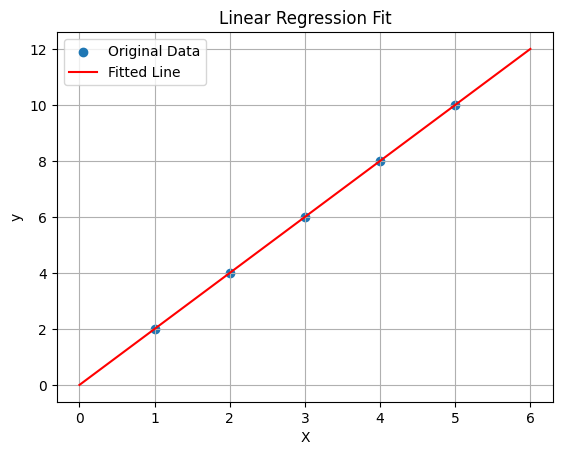

In [ ]:
import matplotlib.pyplot as plt

# Create prediction data
X_pred = torch.linspace(0, 6, 100).unsqueeze(1) # Create 100 points between 0 and 6

# Make predictions using the trained model
with torch.no_grad(): # Disable gradient calculation for inference
    y_pred = model(X_pred)

# Plot the original data and the fitted line
plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X_pred.numpy(), y_pred.numpy(), color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()